<a target="_blank" href="https://medium.com/@hasan.mhowwala/from-pixels-to-patterns-a-machine-learning-odyssey-through-video-analysis-fcd4f4ec2d6c"><img src="https://github-readme-medium-recent-article.vercel.app/medium/@username/index" alt="Medium Article">

Frame Count: 3781
Frame Width: 640
Frame Height: 360
Frame Rate (FPS): 30.0
Video Length (seconds): 126.03333333333333


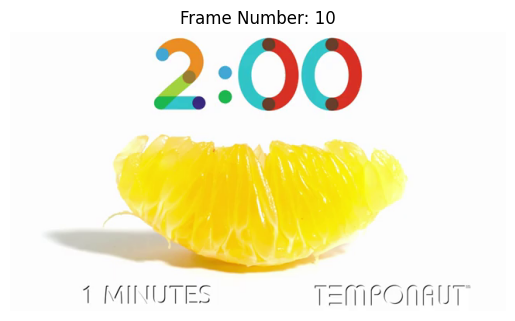

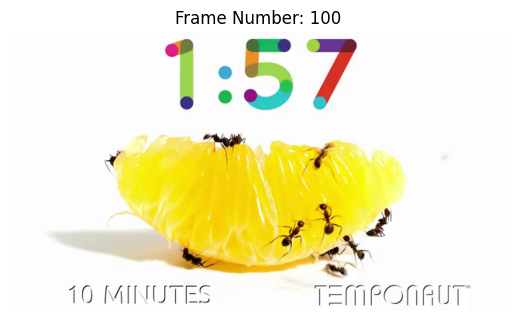

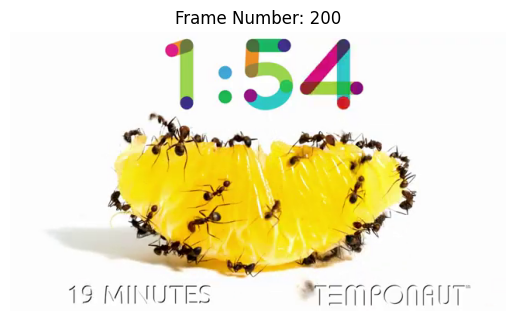

In [1]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the video
video_path = '/content/2 Minute Timer [ANTS vs ORANGE] 🍊🐜.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
video_length = frame_count / frame_rate

print(f"Frame Count: {frame_count}")
print(f"Frame Width: {frame_width}")
print(f"Frame Height: {frame_height}")
print(f"Frame Rate (FPS): {frame_rate}")
print(f"Video Length (seconds): {video_length}")

# Display some frames from the video
sample_frames = [10, 100, 200]

for frame_number in sample_frames:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.title(f"Frame Number: {frame_number}")
        plt.axis('off')
        plt.show()

# Release the video capture object
cap.release()

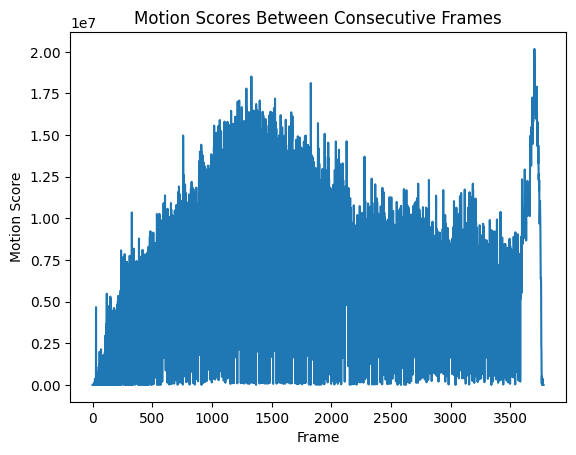

In [2]:
import numpy as np

def calculate_frame_difference(frame1, frame2):
    # Calculate the absolute difference between two frames
    return np.sum(np.abs(frame1.astype(np.int16) - frame2.astype(np.int16)))

# Reload the video
cap = cv2.VideoCapture(video_path)

# Check if the video is opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

motion_scores = []

# Read the first frame
ret, previous_frame = cap.read()

while ret:
    # Read the next frame
    ret, current_frame = cap.read()

    if ret:
        motion_score = calculate_frame_difference(previous_frame, current_frame)
        motion_scores.append(motion_score)

        # Update the previous frame
        previous_frame = current_frame.copy()

# Release the video capture object
cap.release()

# Visualize the motion scores
plt.plot(motion_scores)
plt.title('Motion Scores Between Consecutive Frames')
plt.xlabel('Frame')
plt.ylabel('Motion Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


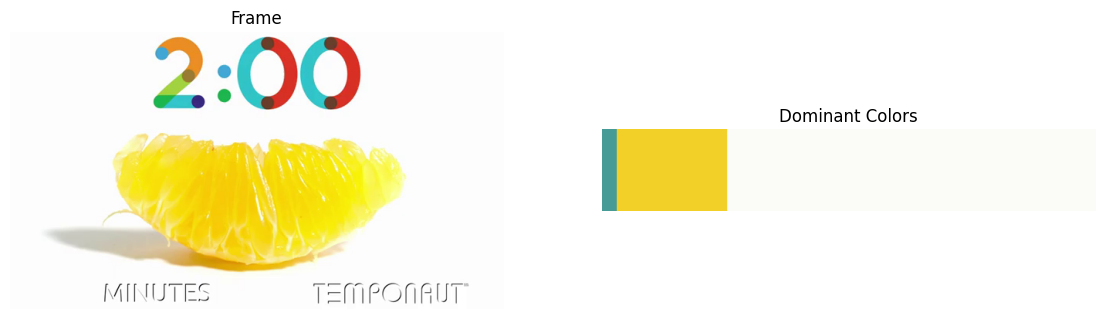

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


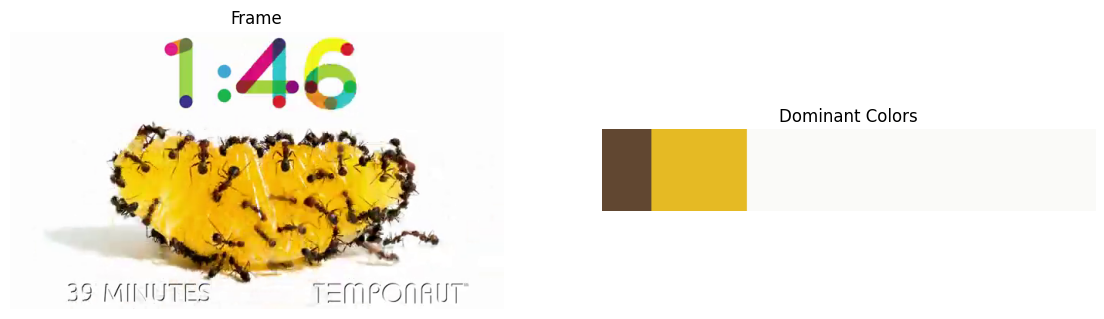

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


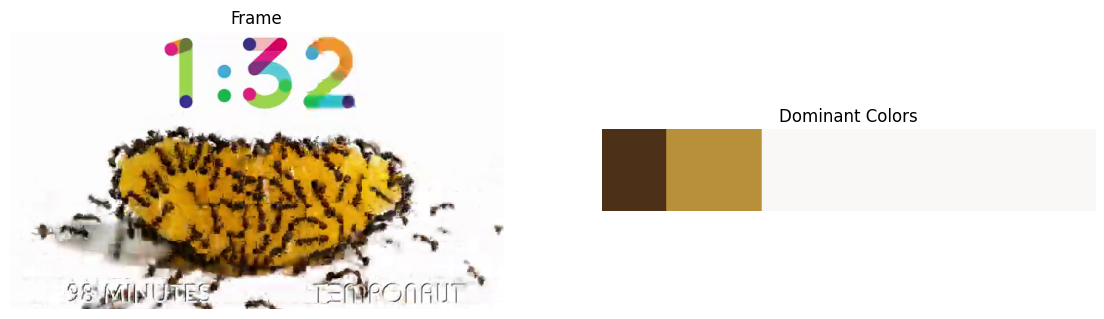

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


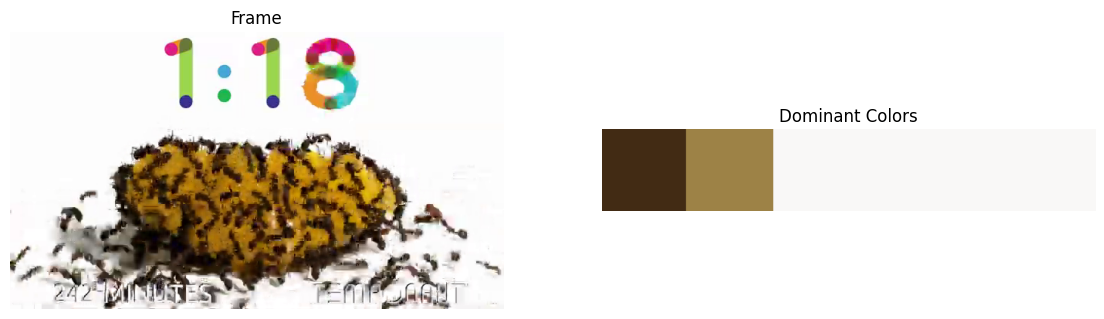

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


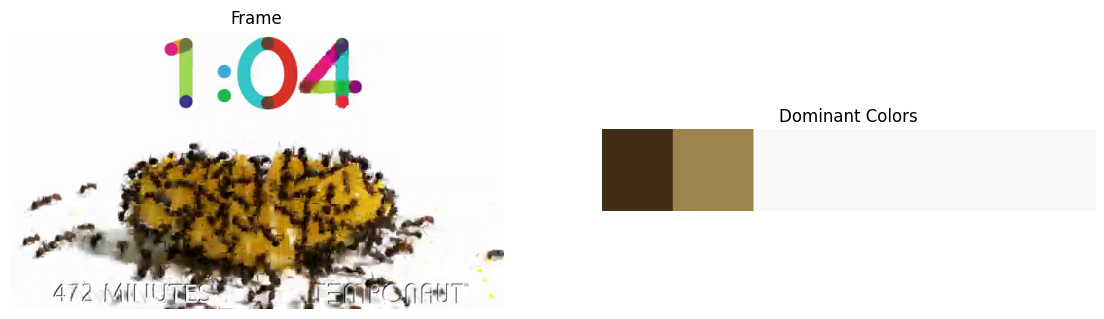

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


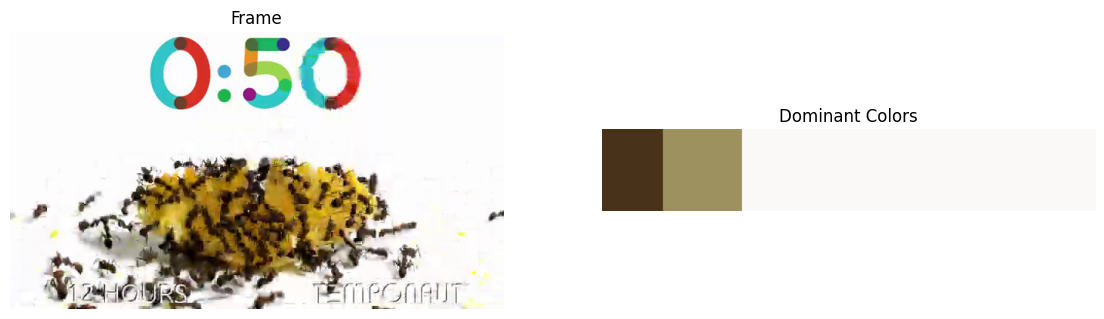

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


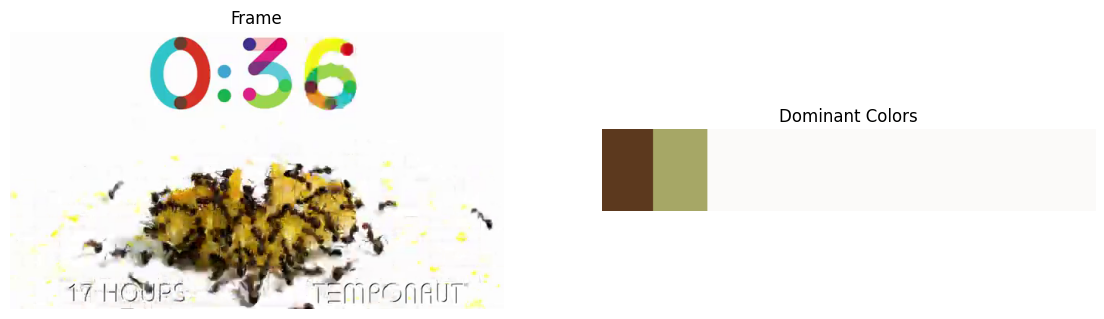

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


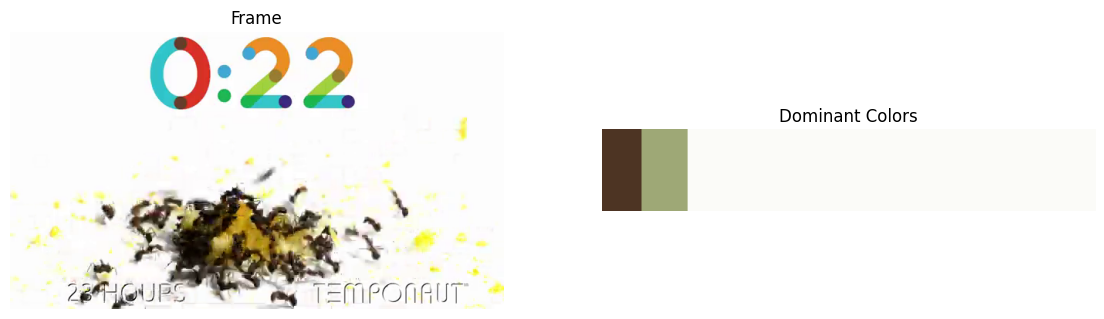

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


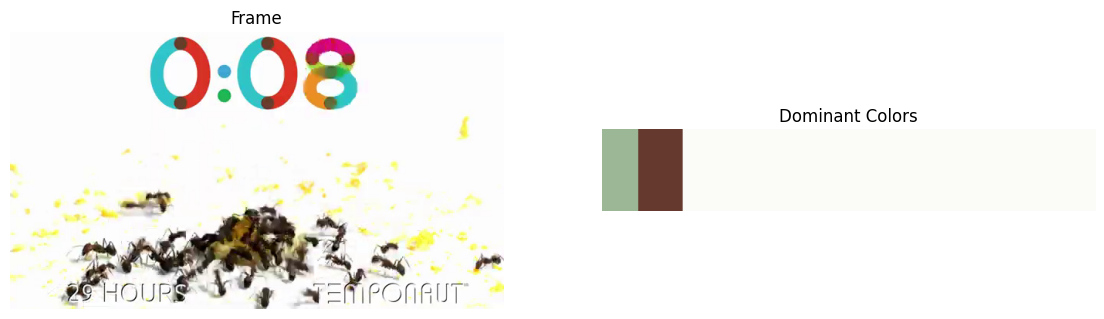

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


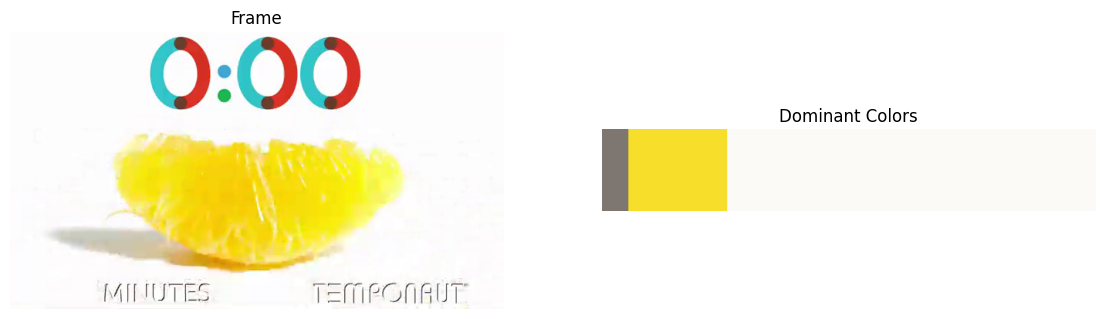

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_ids = np.linspace(0, total_frames-1, num_frames, dtype=int)
    frames = []

    for frame_id in frame_ids:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames


def visualize_colors(cluster, centroids):
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    hist, _ = np.histogram(cluster.labels_, bins=labels)
    hist = hist / hist.sum()

    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), color.astype("uint8").tolist(), -1)
        start = end

    return rect

video_path = '/content/2 Minute Timer [ANTS vs ORANGE] 🍊🐜.mp4'  # Make sure the path to your video is correct
frames = extract_frames(video_path)

for frame in frames:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pixels = frame_rgb.reshape((-1, 3))
    kmeans = KMeans(n_clusters=3).fit(pixels)

    color_analysis = visualize_colors(kmeans, kmeans.cluster_centers_)

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title('Frame')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(color_analysis)
    plt.title('Dominant Colors')
    plt.axis('off')
    plt.show()


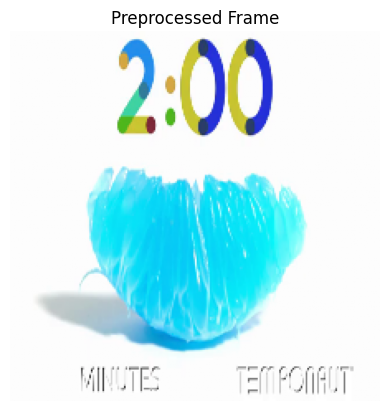

In [12]:
def preprocess_frame(frame, size=(224, 224)):

    # Resize the frame
    frame_resized = cv2.resize(frame, size)

    # Normalize the pixel values
    frame_normalized = frame_resized / 255.0

    return frame_normalized

preprocessed_frames = [preprocess_frame(frame) for frame in frames]

# Displaying a preprocessed frame
plt.imshow(preprocessed_frames[0])
plt.title('Preprocessed Frame')
plt.axis('off')
plt.show()

<ipython-input-19-464ed1485799>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, pixels_per_cell=pixels_per_cell,


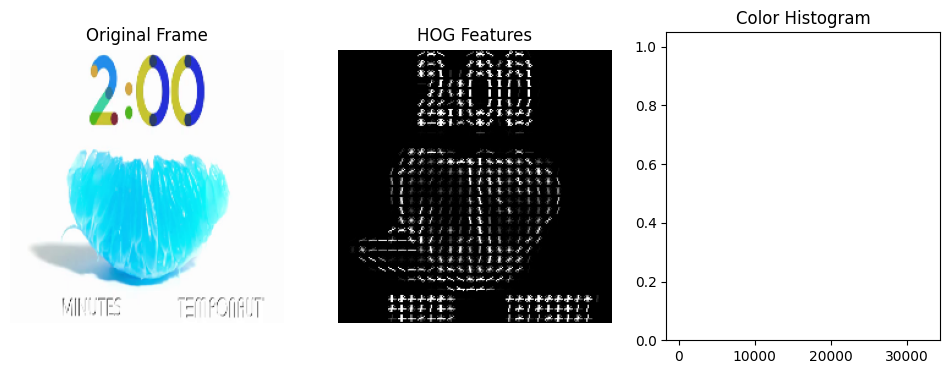

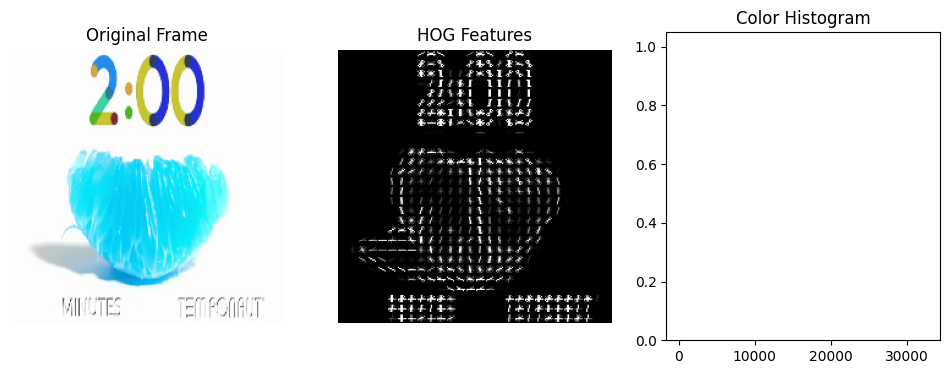

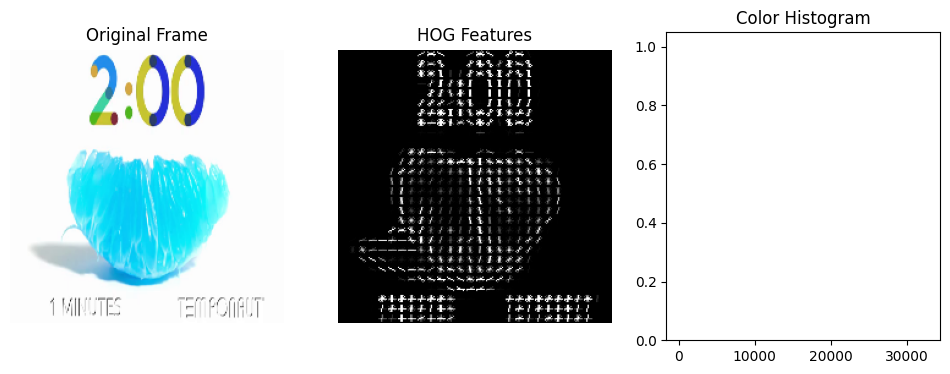

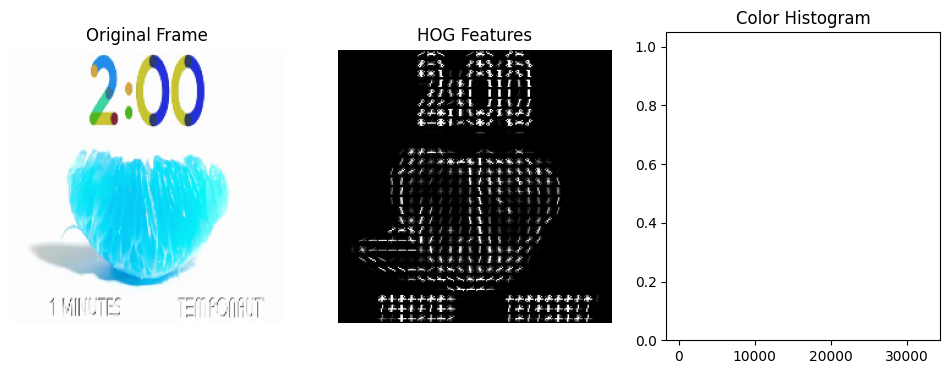

KeyboardInterrupt: ignored

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Function to preprocess frames
def preprocess_frame(frame, size=(224, 224)):
    frame_resized = cv2.resize(frame, size)
    frame_normalized = (frame_resized / 255.0 * 255).astype(np.uint8)
    return frame_normalized

# Function to extract HOG features
def extract_hog_features(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    fd, hog_image = hog(image, pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block, visualize=True, multichannel=False)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return fd, hog_image_rescaled

# Function to extract color histogram features
def extract_color_histogram(image, bins=32):
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Path to your video
video_path = '/content/2 Minute Timer [ANTS vs ORANGE] 🍊🐜.mp4'

# Load the video and extract frames
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
frames = []

while ret:
    frames.append(preprocess_frame(frame))
    ret, frame = cap.read()

cap.release()

# Extract and visualize features from the frames
for frame in frames[:5]:  # Adjust the range to process more frames
    hog_features, hog_image = extract_hog_features(frame)
    color_hist_features = extract_color_histogram(frame)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(frame)
    plt.title('Original Frame')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.bar(np.arange(len(color_hist_features)), color_hist_features)
    plt.title('Color Histogram')
    plt.show()


In [24]:
import matplotlib.pyplot as plt

# Dummy data (replace this with loading your actual features and labels)
features, labels = load_your_data('/content/2 Minute Timer [ANTS vs ORANGE] 🍊🐜.mp4')

# Check if there are any data to visualize
if len(features) > 0 and len(labels) > 0:
    # Assuming labels are binary (0 and 1)
    features_class_0 = features[labels == 0]
    features_class_1 = features[labels == 1]

    # Scatter plot for two features (you can modify this based on the number of features you have)
    plt.scatter(features_class_0[:, 0], features_class_0[:, 1], label='Class 0', alpha=0.6)
    plt.scatter(features_class_1[:, 0], features_class_1[:, 1], label='Class 1', alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Feature Distribution by Class')
    plt.legend()
    plt.show()
else:
    print("No data available for visualization.")

No data available for visualization.


In [25]:
def load_your_data(video_path):
    cap = cv2.VideoCapture(video_path)
    features = []
    labels = []  # Assign labels according to your classification task

    ret, frame = cap.read()
    while ret:
        feat = extract_features(frame)
        features.append(feat)
        # labels.append(your_label)  # Assign labels according to your classification task
        ret, frame = cap.read()

    cap.release()
    print(f"Number of features: {len(features)}")  # Debugging line
    print(f"Number of labels: {len(labels)}")  # Debugging line

    return np.array(features), np.array(labels)

# Load data
video_path = '/content/2 Minute Timer [ANTS vs ORANGE] 🍊🐜.mp4'
features, labels = load_your_data(video_path)

Number of features: 3781
Number of labels: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


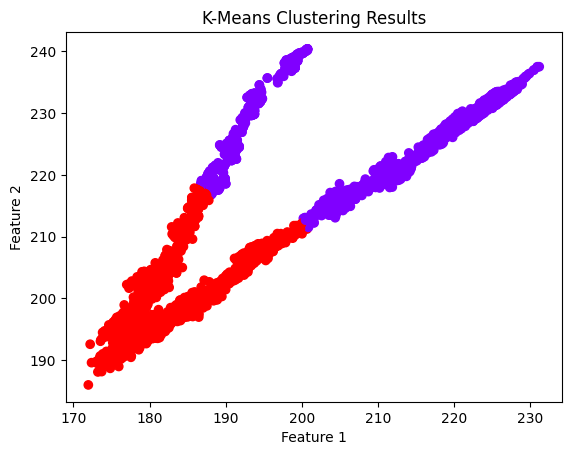

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters you want to create
n_clusters = 2  # You can change this based on your requirement

# Applying K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(features)

# Visualizing the clusters (assuming you have two features for simplicity)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.show()

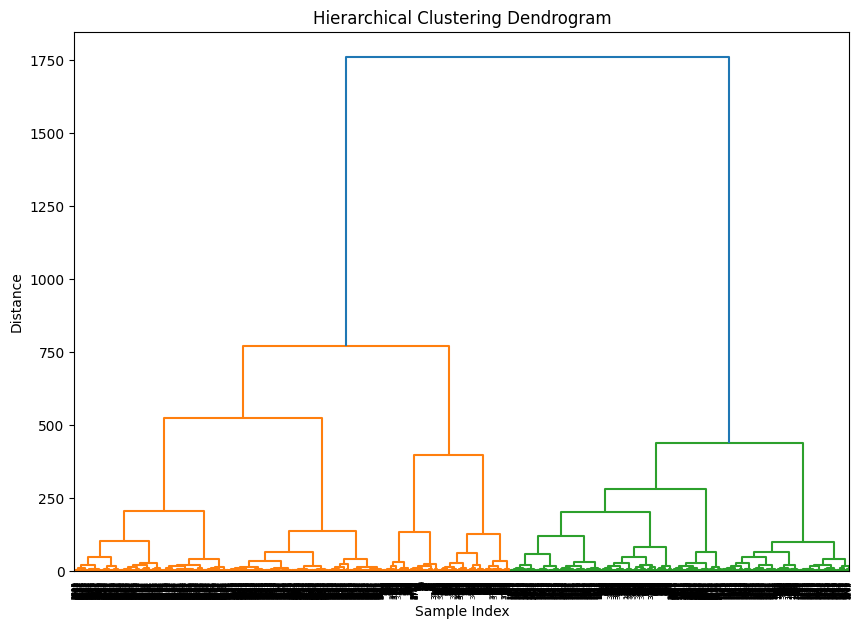

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Performing hierarchical clustering
linked = linkage(features, 'ward')  # 'ward' is one method of calculating distance

# Visualizing the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Cluster Centers:
          Feature_1   Feature_2   Feature_3
Cluster                                    
0        210.932783  225.542238  229.670678
1        183.854534  201.151878  210.534478

Cluster Sizes:
0    1982
1    1799
Name: Cluster, dtype: int64

Feature Distributions in Cluster 0:


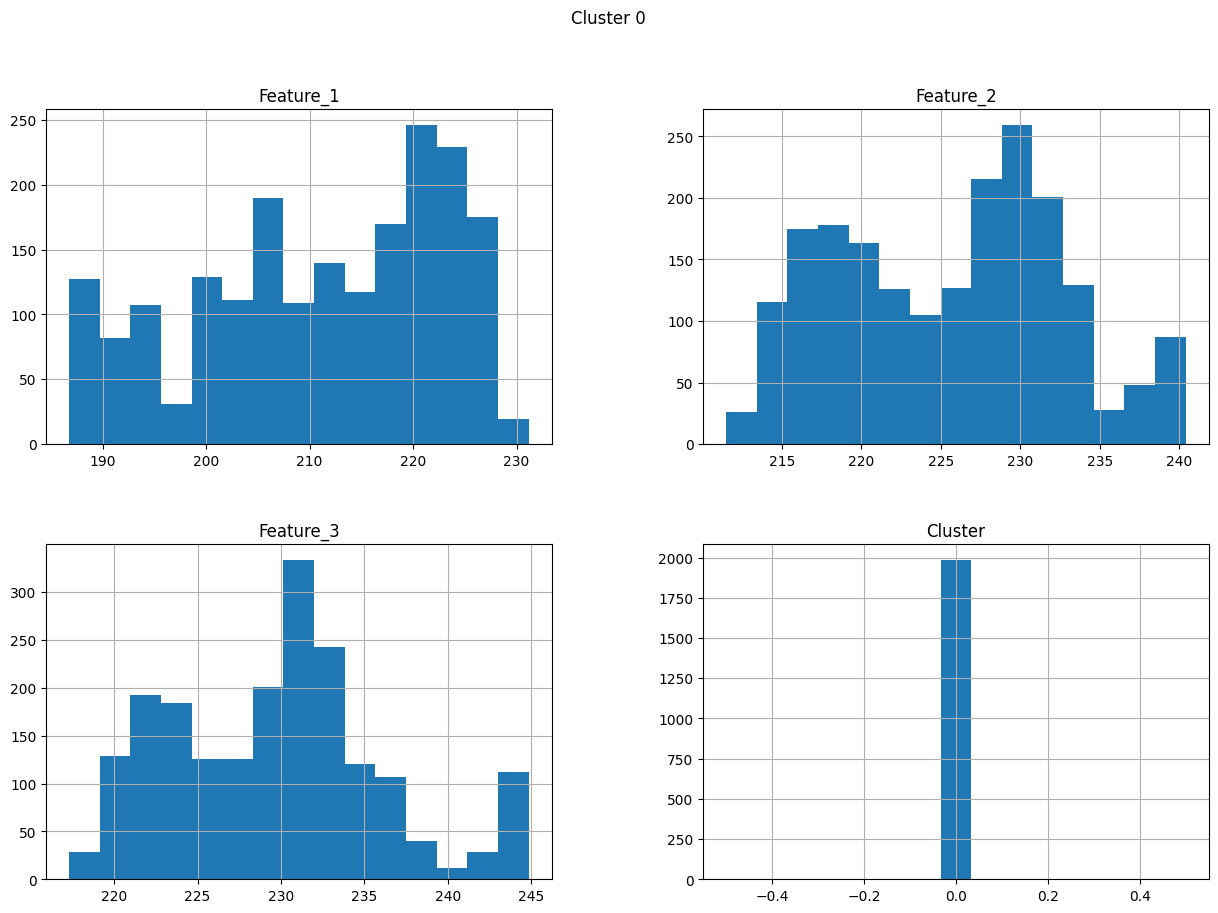


Feature Distributions in Cluster 1:


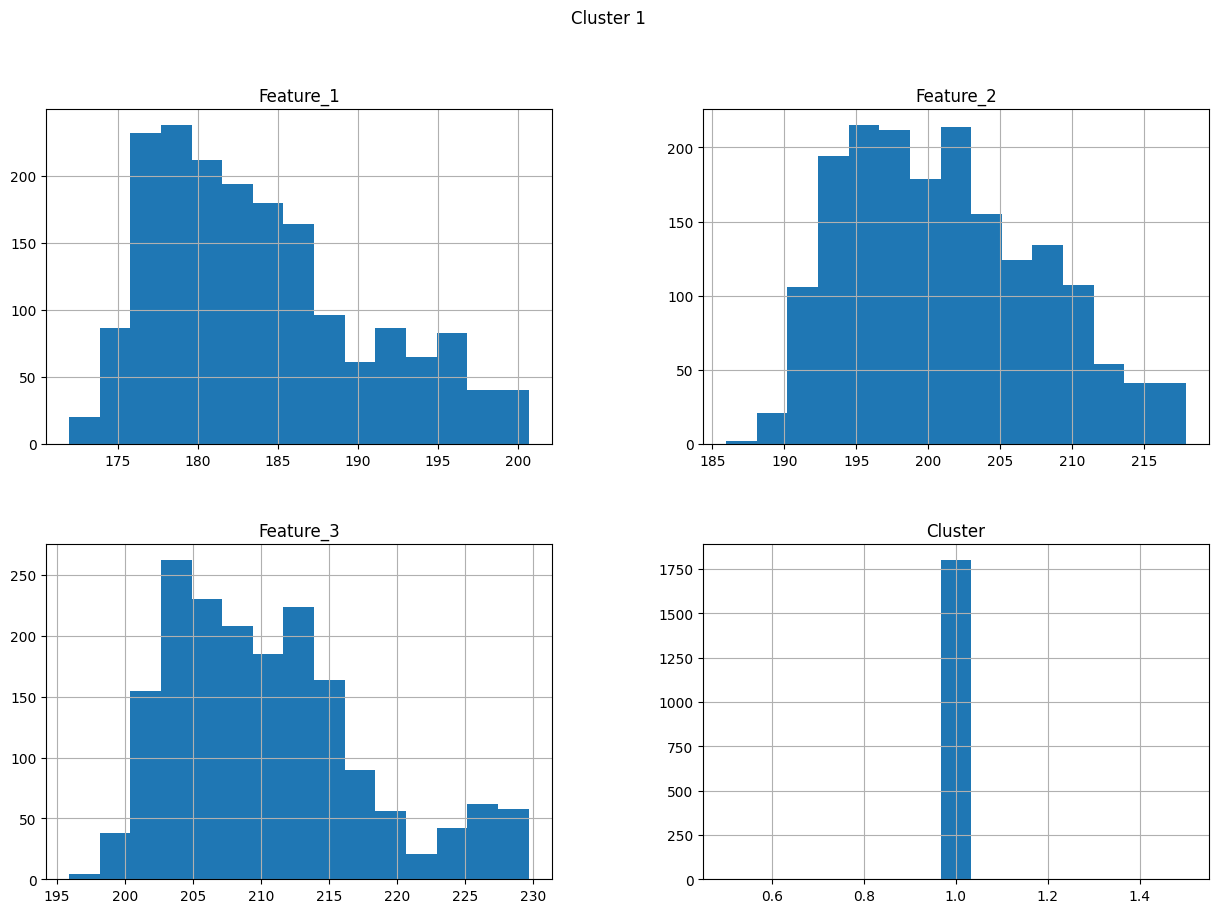

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


unique_labels = np.unique(labels)

# Creating a DataFrame to facilitate the analysis
df = pd.DataFrame(features, columns=['Feature_1', 'Feature_2', 'Feature_3'])  # Add more feature names as needed
df['Cluster'] = labels

# 1. Compute Cluster Centers
cluster_centers = df.groupby('Cluster').mean()
print("Cluster Centers:")
print(cluster_centers)

# 2. Analyze Cluster Sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

# 3. Examine Feature Distributions
for label in unique_labels:
    print(f"\nFeature Distributions in Cluster {label}:")
    subset = df[df['Cluster'] == label]
    subset.hist(bins=15, figsize=(15, 10))
    plt.suptitle(f"Cluster {label}")
    plt.show()